<a href="https://colab.research.google.com/github/hamin32/boostcourse_assignment/blob/main/3%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [4]:
clf = clf.fit(X, Y)
clf

DecisionTreeClassifier()

In [5]:
clf.predict([[2., 2.]])

array([1])

In [6]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

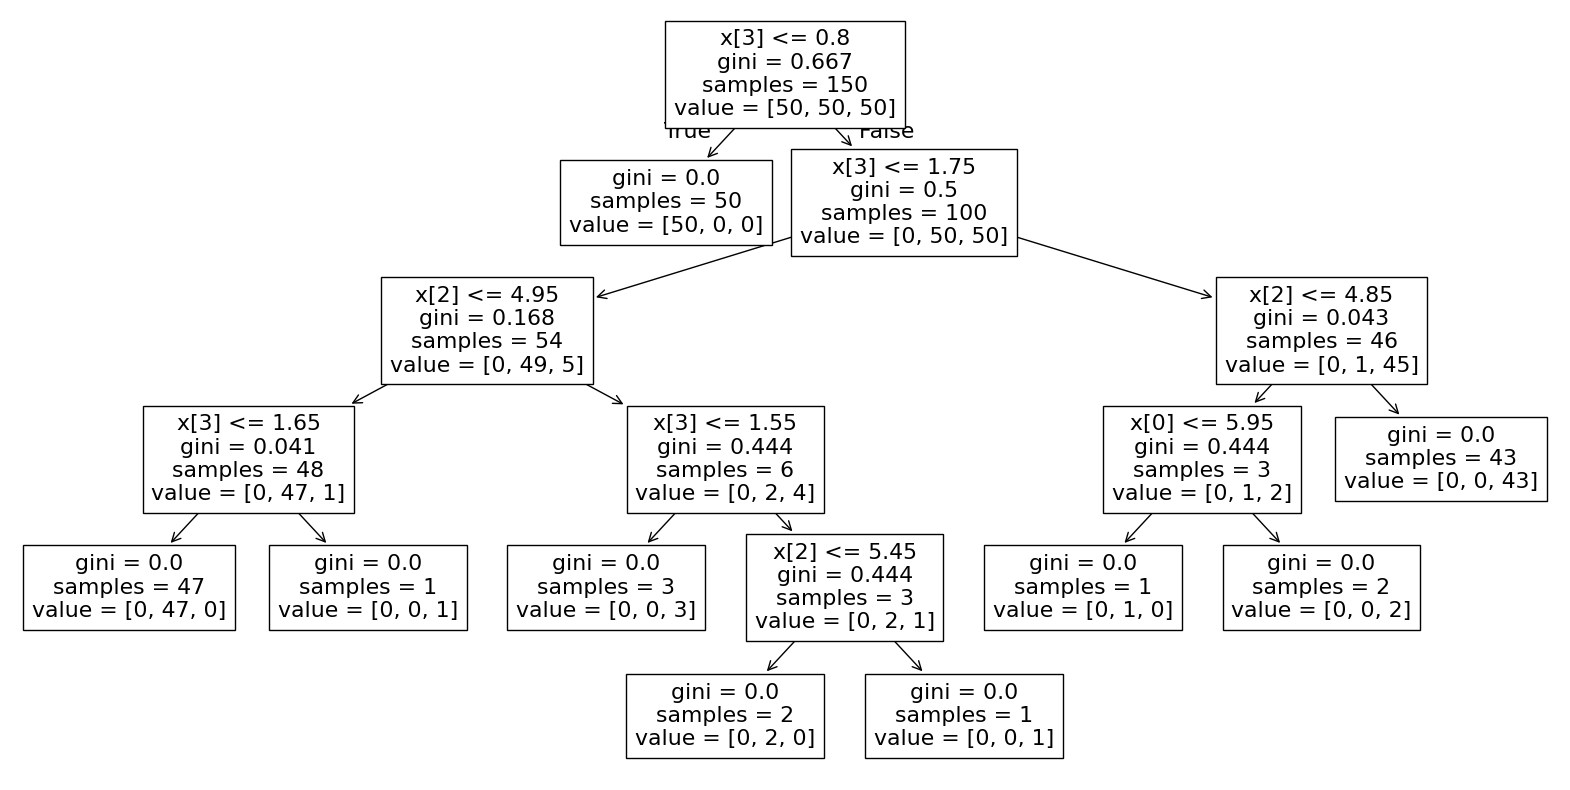

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
t = tree.plot_tree(clf.fit(X, y))


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
df = pd.read_csv("/content/diabetes.csv")

df.shape


(768, 9)

In [12]:
split_count = int(df.shape[0] * 0.8)

split_count


614

In [13]:
train = df[:split_count].copy()

train.shape


(614, 9)

In [14]:
test = df[split_count:].copy()

test.shape


(154, 9)

In [15]:
feature_names = train.columns[:-1].tolist()

feature_names


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [16]:
label_name = train.columns[-1]

label_name

'Outcome'

In [17]:
X_train = train[feature_names]
print(X_train.shape)

X_train.head()


(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [18]:
y_train = train[label_name]
print(y_train.shape)

y_train.head()


(614,)


,Outcome
0,1
1,0
2,1
3,0
4,1


In [19]:
X_test = test[feature_names]
print(X_test.shape)

X_test.head()


(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [20]:
y_test = test[label_name]
print(y_test.shape)

y_test.head()


(154,)


,Outcome
614,1
615,0
616,0
617,0
618,1


In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model


DecisionTreeClassifier()

In [22]:
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [23]:
y_predict = model.predict(X_test)

y_predict[:5]

array([1, 0, 1, 0, 1])

[Text(0.5707475786924939, 0.9705882352941176, 'Glucose <= 154.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.1917372881355932, 0.9117647058823529, 'BMI <= 26.35\ngini = 0.385\nsamples = 518\nvalue = [383, 135]'),
 Text(0.38124243341404357, 0.9411764705882353, 'True  '),
 Text(0.0387409200968523, 0.8529411764705882, 'Glucose <= 124.5\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(0.01937046004842615, 0.7941176470588235, 'DiabetesPedigreeFunction <= 0.675\ngini = 0.019\nsamples = 105\nvalue = [104, 1]'),
 Text(0.009685230024213076, 0.7352941176470589, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(0.029055690072639227, 0.7352941176470589, 'DiabetesPedigreeFunction <= 0.705\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.01937046004842615, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0387409200968523, 0.6764705882352942, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.05811138014527845, 0.7941176470588235, 'BloodPressur

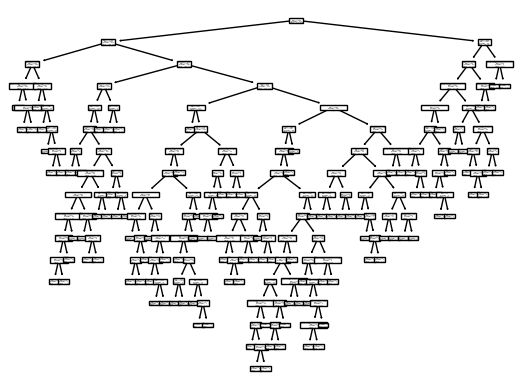

In [24]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names=feature_names)

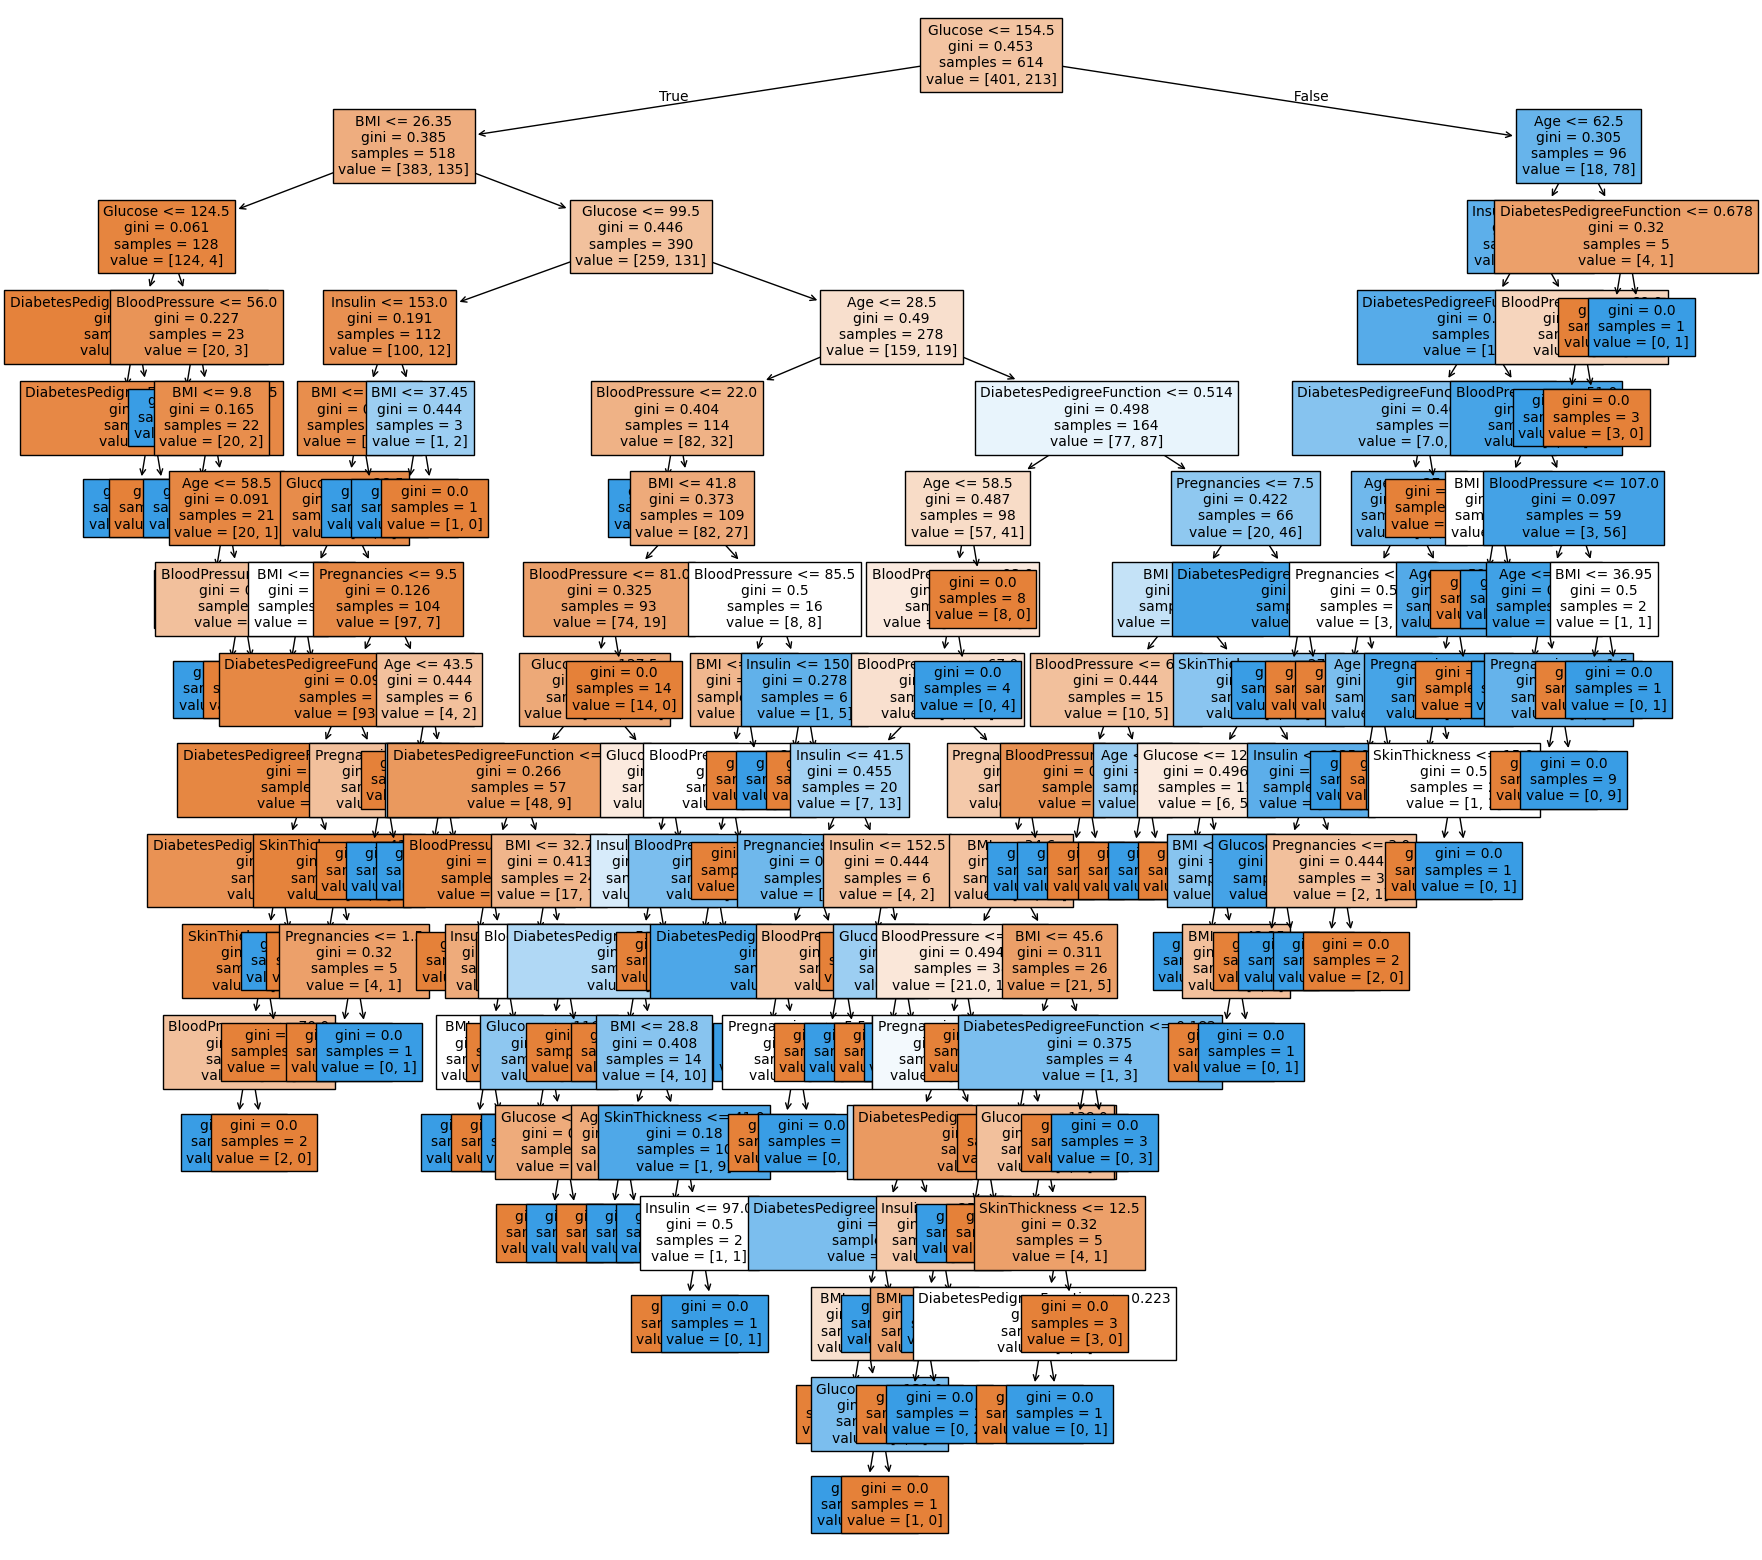

In [25]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names=feature_names,
                 filled=True,
                 fontsize=10)


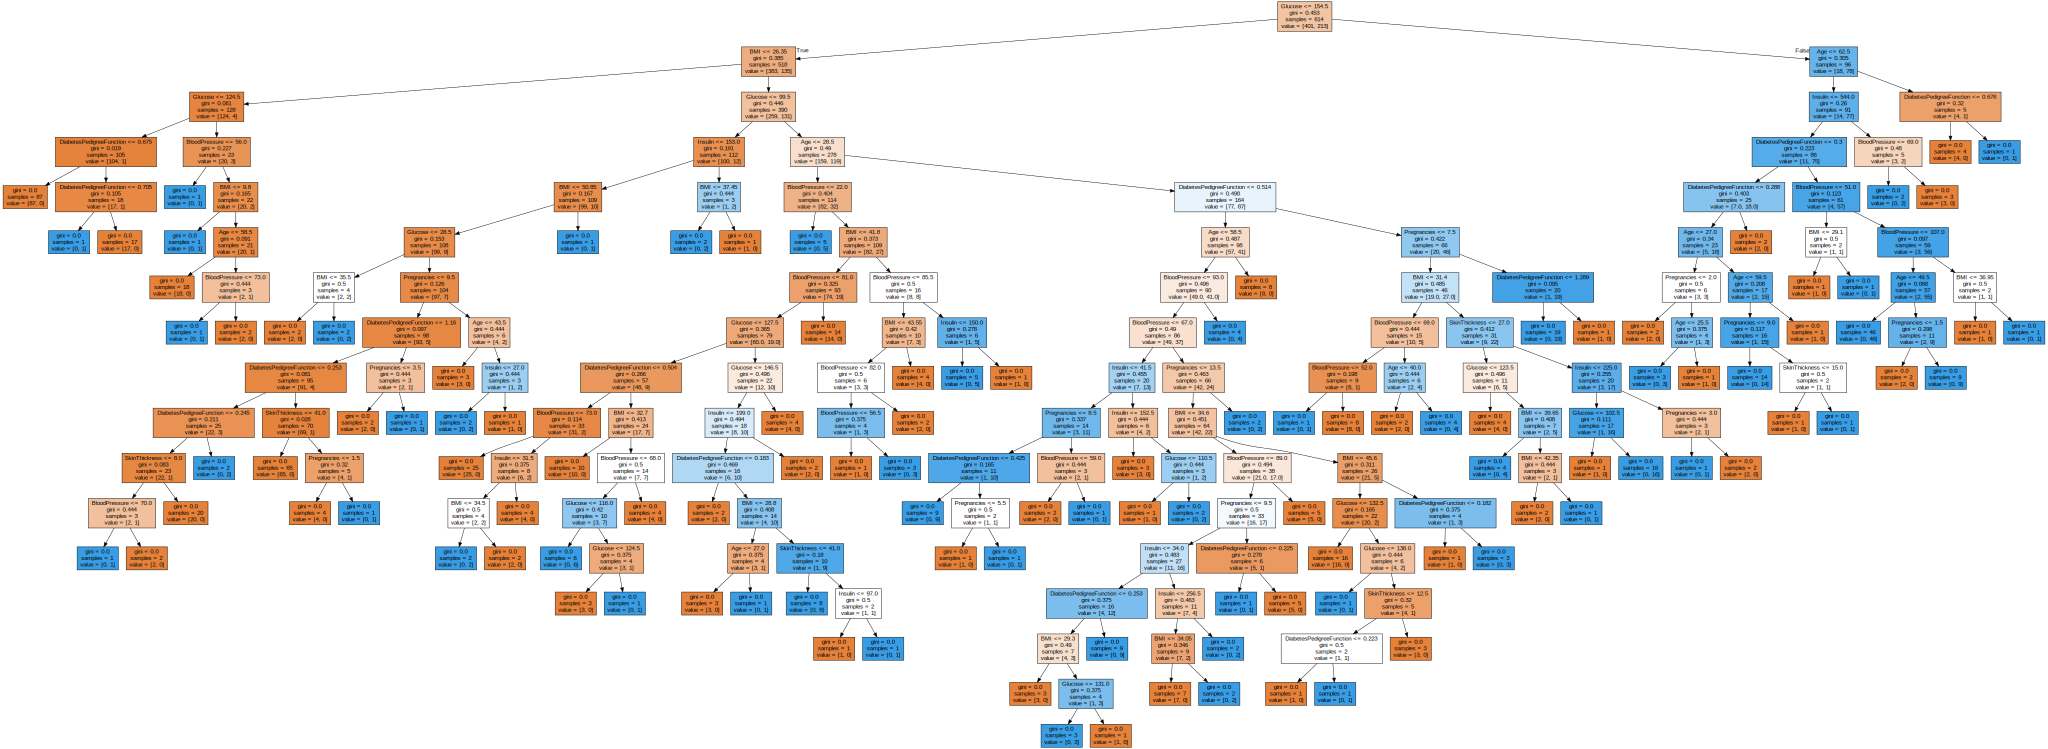

In [26]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names=feature_names,
                           filled=True)

graphviz.Source(dot_tree)


In [27]:
model.feature_importances_

array([0.0736991 , 0.30960021, 0.13075471, 0.02002308, 0.06932641,
       0.19138259, 0.10993382, 0.09528008])

<Axes: >

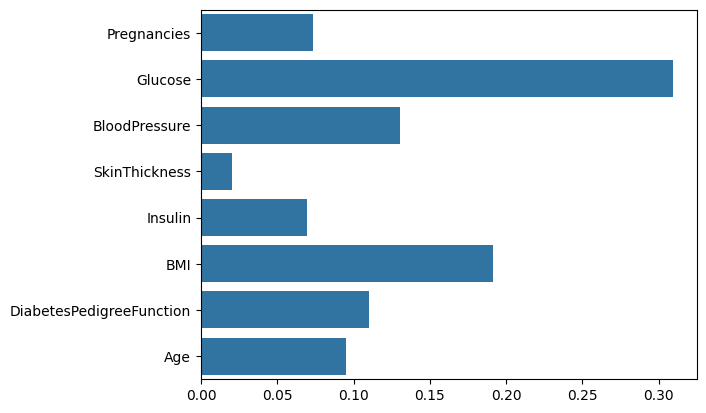

In [28]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [29]:
diff_count = abs(y_test - y_predict).sum()

diff_count


np.int64(45)

In [30]:
abs(y_test - y_predict).sum() / len(y_test)

(len(y_test) - diff_count) / len(y_test) * 100


np.float64(70.77922077922078)

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

model.score(X_test, y_test) * 100


70.77922077922078

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [34]:
df = pd.read_csv("/content/diabetes.csv")
df.shape

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
df_null = df.isnull()

df_null.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [37]:
df_null.sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [38]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
feature_columns = df.columns[0:-1].tolist()

feature_columns


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [40]:
cols = feature_columns[1:]

cols


['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [41]:
df_null = df[cols].replace(0, np.nan)

df_null = df_null.isnull()

df_null.sum()


,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0


<Axes: >

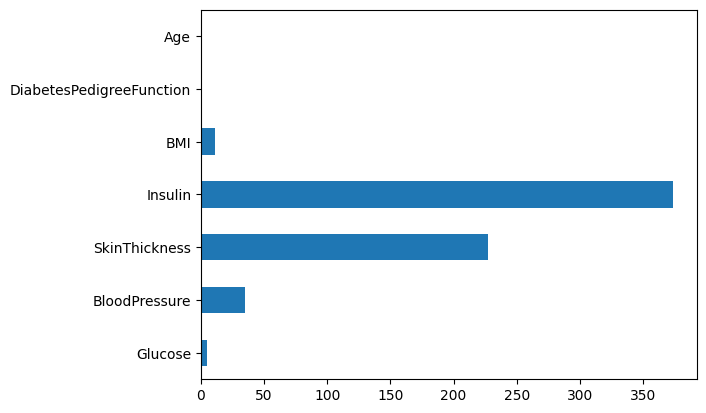

In [42]:
df_null.sum().plot.barh()


In [43]:
df_null.mean() * 100


,0
Glucose,0.651042
BloodPressure,4.557292
SkinThickness,29.557292
Insulin,48.697917
BMI,1.432292
DiabetesPedigreeFunction,0.000000
Age,0.000000


<Axes: >

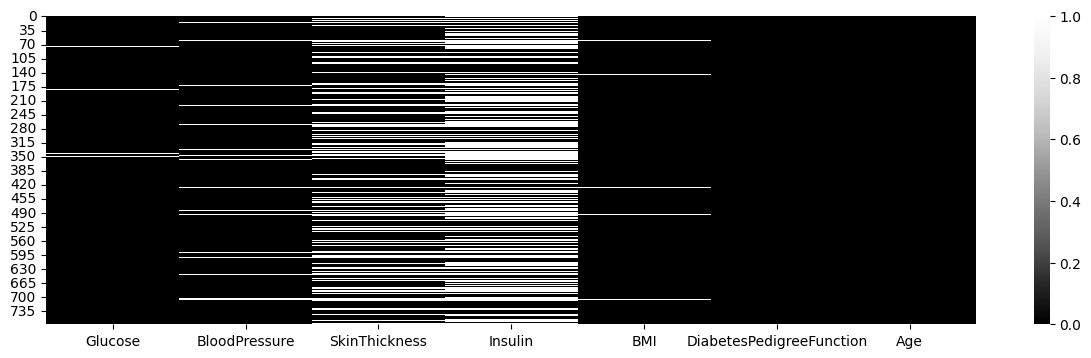

In [44]:
plt.figure(figsize=(15, 4))
sns.heatmap(df_null, cmap="Greys_r")


In [45]:
df["Outcome"]

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [46]:
df["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


In [47]:
df["Outcome"].value_counts(normalize=True)

,proportion
Outcome,
0,0.651042
1,0.348958


In [48]:
df.groupby(["Pregnancies"])["Outcome"].mean()


,Outcome
Pregnancies,
0,0.342342
1,0.214815
2,0.184466
3,0.360000
4,0.338235
5,0.368421
6,0.320000
7,0.555556
8,0.578947


In [49]:
df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"])


,mean,count
Pregnancies,,
0,0.342342,111
1,0.214815,135
2,0.184466,103
3,0.360000,75
4,0.338235,68
5,0.368421,57
6,0.320000,50
7,0.555556,45
8,0.578947,38


In [50]:
df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()

df_po


,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<Axes: >

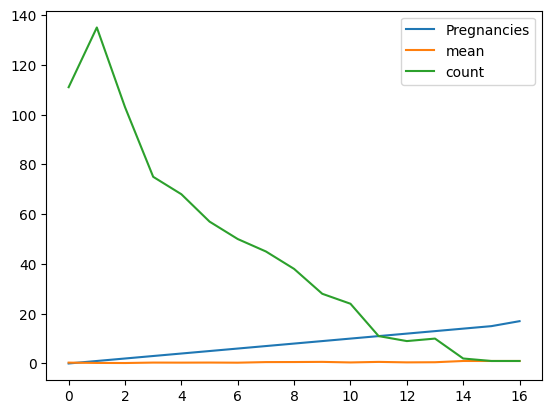

In [51]:
df_po.plot()


<Axes: >

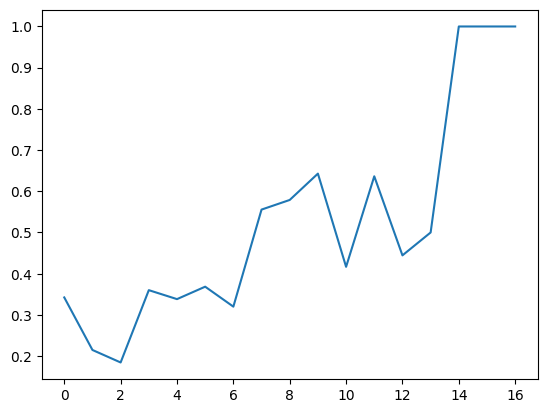

In [52]:
df_po["mean"].plot()


<Axes: >

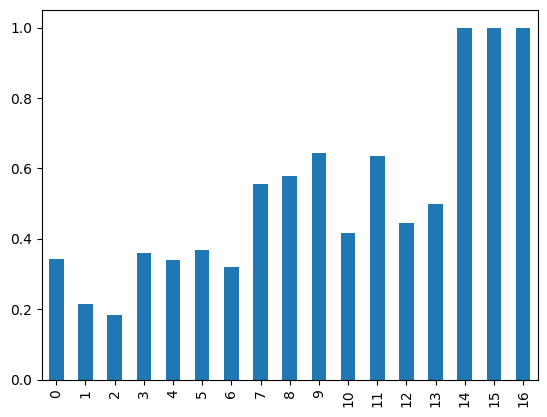

In [53]:
df_po["mean"].plot.bar()


<Axes: xlabel='Outcome', ylabel='count'>

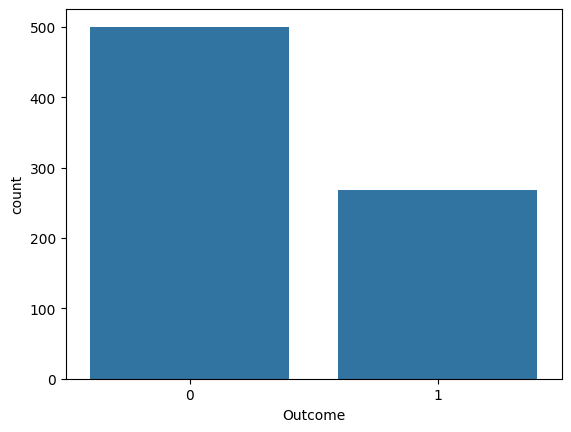

In [54]:
sns.countplot(data=df, x="Outcome")


<Axes: xlabel='Pregnancies', ylabel='count'>

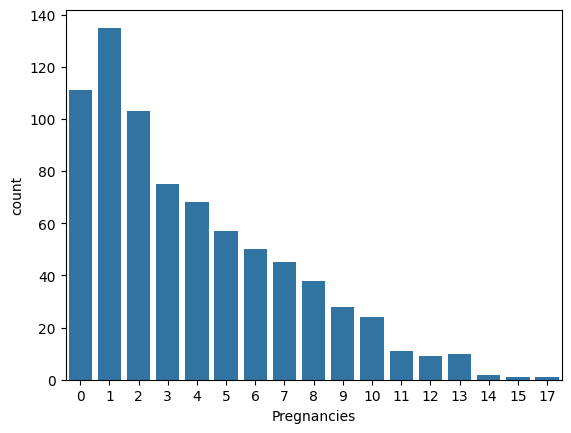

In [55]:
sns.countplot(data=df, x="Pregnancies")


<Axes: xlabel='Pregnancies', ylabel='count'>

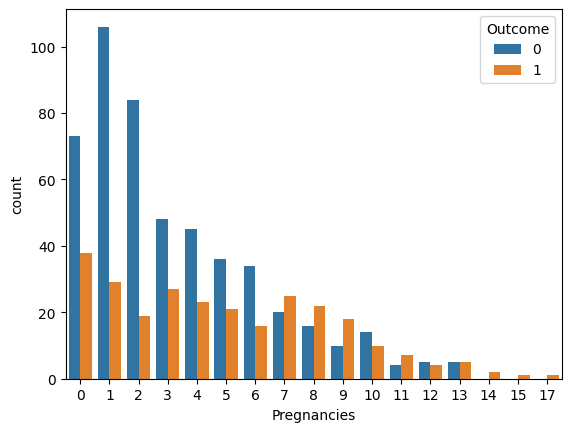

In [56]:
sns.countplot(data=df, x="Pregnancies", hue="Outcome")


In [58]:
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()


,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<Axes: xlabel='Pregnancies_high', ylabel='count'>

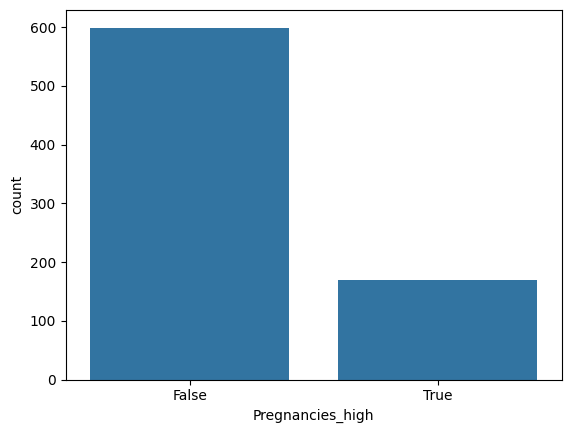

In [59]:
sns.countplot(data=df, x="Pregnancies_high")

<Axes: xlabel='Pregnancies_high', ylabel='count'>

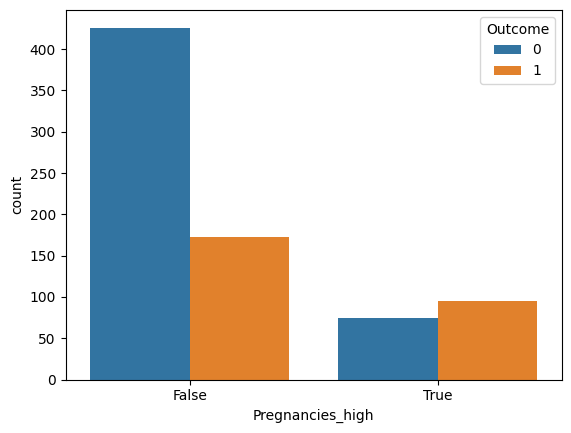

In [60]:
sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")

In [62]:
df["Pregnancies_high"] = df["Pregnancies"] > 6


In [63]:
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<Axes: xlabel='Pregnancies_high', ylabel='count'>

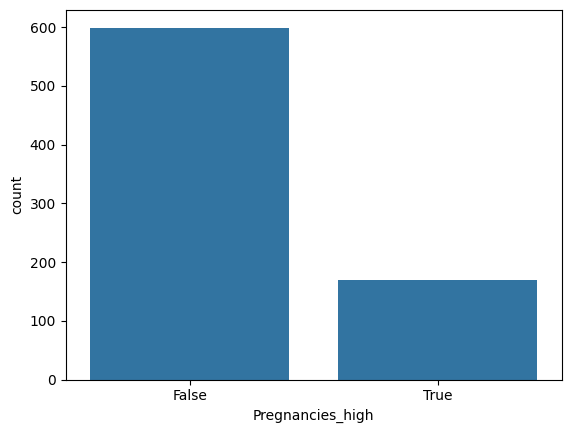

In [64]:
sns.countplot(data=df, x="Pregnancies_high")

<Axes: xlabel='Pregnancies_high', ylabel='count'>

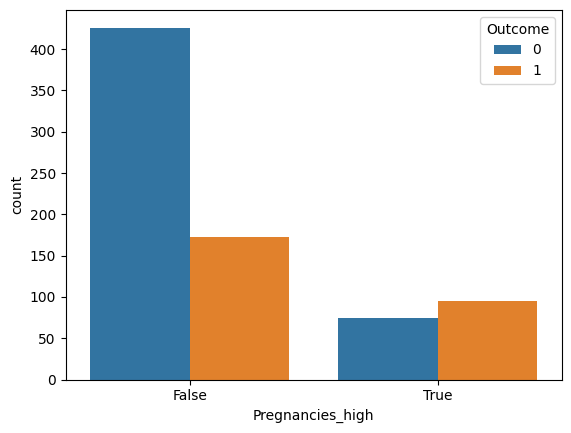

In [65]:
sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")

In [68]:
feature_columns = df.columns[:-1].tolist()   # 피처
label_name = df.columns[-1]                  # 라벨


In [69]:
df.groupby(["Pregnancies"])["Outcome"].mean()
df.groupby(["Pregnancies"])["Outcome"].agg(["mean","count"])


,mean,count
Pregnancies,,
0,0.342342,111
1,0.214815,135
2,0.184466,103
3,0.360000,75
4,0.338235,68
5,0.368421,57
6,0.320000,50
7,0.555556,45
8,0.578947,38


In [70]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [71]:
accuracy_score(y_test, y_pred)
model.score(X_test, y_test)


0.7597402597402597

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

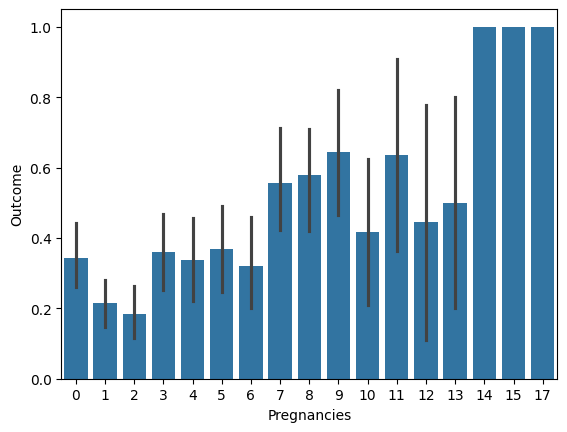

In [72]:
sns.barplot(data=df, x="Pregnancies", y="Outcome")


<Axes: xlabel='Pregnancies', ylabel='Glucose'>

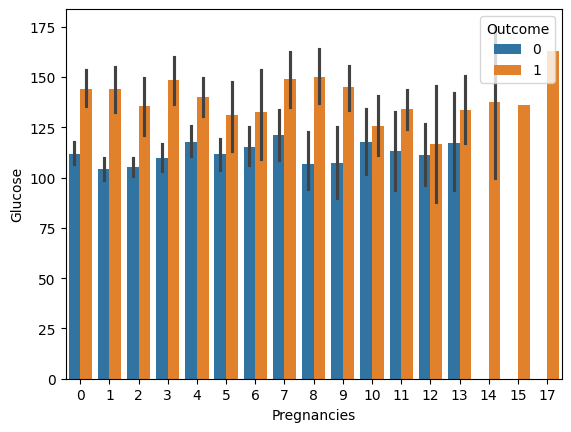

In [73]:
sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")


<Axes: xlabel='Pregnancies', ylabel='BMI'>

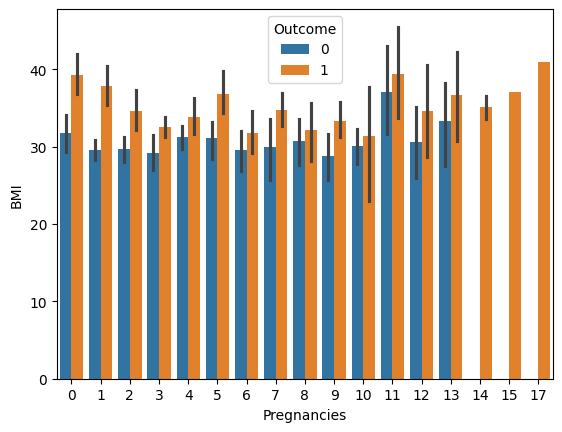

In [74]:
sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")


<Axes: xlabel='Pregnancies', ylabel='Insulin'>

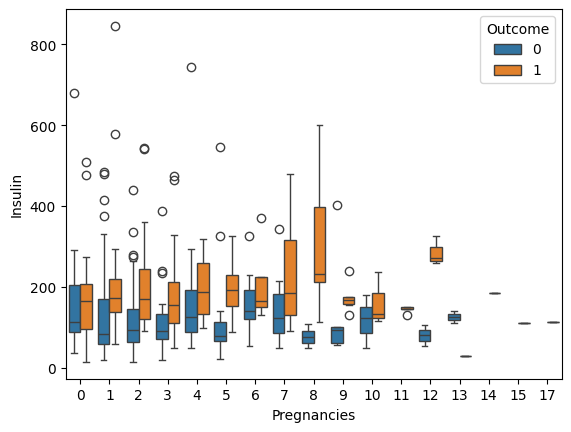

In [75]:
sns.boxplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")


<Axes: xlabel='Pregnancies', ylabel='Insulin'>

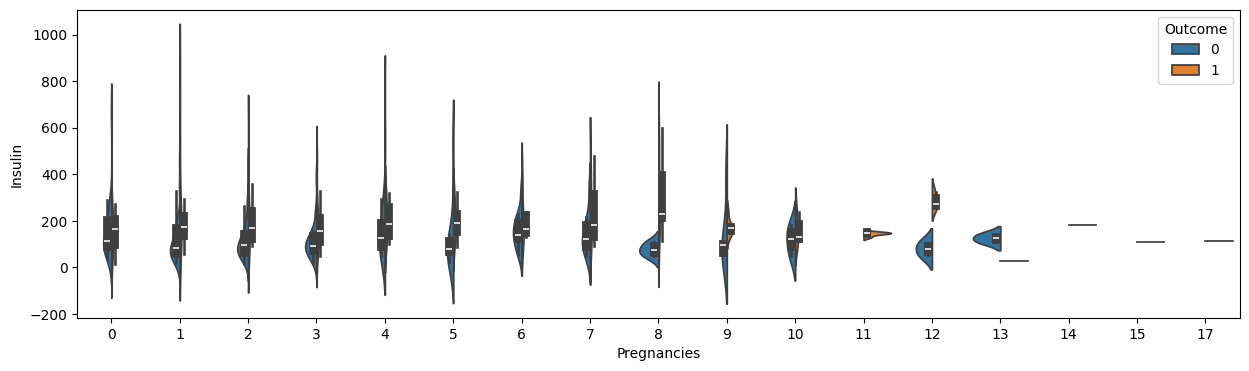

In [76]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome", split=True)


/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Pregnancies', ylabel='Insulin'>

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


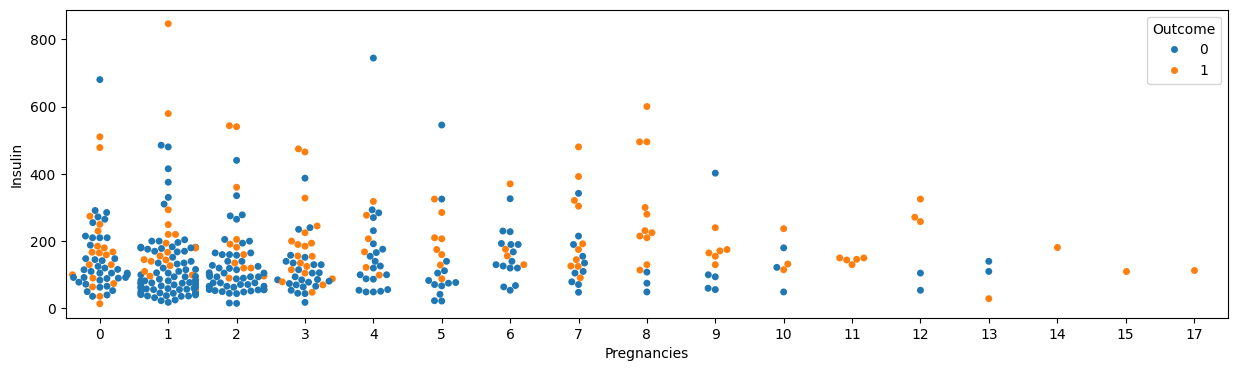

In [77]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")
